In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 66.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 101.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.9/82.9 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.5 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0


In [ ]:
!pip install tmdbv3api

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import re

##Data Loading

In [ ]:
movies_df = pd.read_csv('movies.csv')

In [ ]:
movies_df.sample(10)

,movieId,title,genres
3907,4011,Snatch (2000),Comedy|Crime|Thriller
36306,149904,Grand Old Girl (1935),(no genres listed)
24480,121594,Midnight Mary (1933),Crime|Drama|Romance
61877,207155,The Love of Jeanne Ney (1927),Drama
22223,113970,Mi Amigo Hugo (2014),Documentary
7026,7151,Girl with a Pearl Earring (2003),Drama|Romance
26154,125295,Hellcats of the Navy (1957),Action|Thriller|War
43333,165783,If I Were Free (1933),(no genres listed)
21760,112185,"Outlaw, The (Lope) (2010)",Drama
38073,153985,The Girl with the Red Hair (1981),(no genres listed)


In [ ]:
tags = pd.read_csv('tags.csv')

In [ ]:
tags.sample(10)

,userId,movieId,tag,timestamp
843490,118196,104879,realistic action,1385062922
641157,78784,79718,nature,1525446553
752534,100582,97938,visual effects,1472199059
198763,6550,165789,poverty,1526617616
686134,86425,71464,comedy,1365944675
709854,92018,1193,jack nicholson,1507150435
104168,6550,45000,politics,1527401968
509273,56152,316,science fiction,1394473952
241489,10623,182715,forest,1527364081
227626,7335,54259,fairy tale,1502931165


In [ ]:
tags.shape

(1093360, 4)

In [ ]:
movies_df.shape

(62423, 3)

In [ ]:
links = pd.read_csv('links.csv')

In [ ]:
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [ ]:
links.shape

(62423, 3)

In [ ]:
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
ratings = pd.read_csv('ratings.csv')

In [ ]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


In [ ]:
ratings.query("movieId == 1")

,userId,movieId,rating,timestamp
70,2,1,3.5,1141415820
254,3,1,4.0,1439472215
910,4,1,3.0,1573944252
1152,5,1,4.0,858625949
1304,8,1,4.0,890492517
...,...,...,...,...
24997918,162529,1,2.0,888181499
24998300,162530,1,5.0,989808332
24998525,162533,1,4.5,1280920369
24998892,162534,1,4.0,1526714137


In [ ]:
# Filter users who rated movies above a certain threshold (e.g., 3.5)
ground_truth = ratings[ratings['rating'] > 3.5]


In [ ]:

ground_truth.shape

(12452811, 4)

In [ ]:
# Reset the index
ground_truth = ground_truth.reset_index(drop=True)


In [ ]:


# Ensure at least two ratings per movie
def sample_3_ratings(group):
    return group.sample(n=min(3, len(group)), random_state=42)  # Sample at most 2 ratings per movie

# Group by movieId and apply the sampling function
sampled_ratings = ground_truth.groupby('movieId', as_index=False).apply(sample_3_ratings)

# Reset the index if needed
sampled_ratings = sampled_ratings.reset_index(drop=True)

# Display the first few rows of the sampled dataset
print(sampled_ratings.head())
print(f"Total unique movies in sampled dataset: {sampled_ratings['movieId'].nunique()}")


   userId  movieId  rating   timestamp
0  145762        1     4.5  1480732323
1  146822        1     4.0  1495650343
2   40829        1     4.0  1451088611
3   28652        2     4.0  1351932214
4   69244        2     4.0   844668412
Total unique movies in sampled dataset: 40858


In [ ]:
sampled_ratings.shape

(94805, 4)

we merge each datasets into one for easy exploration

In [ ]:
# Merge the sampled ratings with the movie DataFrame
merged_data = pd.merge(sampled_ratings, movies_df, on='movieId', how='left')


In [ ]:
merged_data.tail()

,userId,movieId,rating,timestamp,title,genres
94800,115835,209123,4.0,1574173603,Square Roots: The Story of SpongeBob SquarePan...,Documentary
94801,115835,209129,4.5,1574183537,Destination Titan (2011),Documentary
94802,127710,209133,4.5,1574186235,The Riot and the Dance (2018),(no genres listed)
94803,134916,209155,5.0,1574272160,Santosh Subramaniam (2008),Action|Comedy|Romance
94804,6964,209163,4.5,1574284913,Bad Poems (2018),Comedy|Drama


In [ ]:
merged_data.shape

(94805, 6)

In [ ]:
#movies dataframe and tags
new_df = pd.merge(movies_df, tags, on='movieId')
new_df.head()

,movieId,title,genres,userId,tag,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,791,Owned,1515175493
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1048,imdb top 250,1172144394
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1361,Pixar,1216146311
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3164,Pixar,1223304727
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3164,time travel,1223304729


In [ ]:
new_df1 = pd.merge(new_df, links, on='movieId')
new_df1.sample()

,movieId,title,genres,userId,tag,timestamp,imdbId,tmdbId
700890,77307,Dogtooth (Kynodontas) (2009),Drama,38209,10/10,1405418967,1379182,38810.0


##Exploratory Data Analysis


A look at the genres column show thats the genres is expressed as a string with a pipe | separating each genre. We will manipulate this string into a list, which will make it much easier to analyze.

In [ ]:
new_df1['genres'] = new_df1['genres'].apply(lambda x: x.split("|"))
new_df1.head()

,movieId,title,genres,userId,tag,timestamp,imdbId,tmdbId
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",791,Owned,1515175493,114709,862.0
1,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1048,imdb top 250,1172144394,114709,862.0
2,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1361,Pixar,1216146311,114709,862.0
3,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",3164,Pixar,1223304727,114709,862.0
4,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",3164,time travel,1223304729,114709,862.0


In [ ]:
from collections import Counter

genre_frequency = Counter(g for genres in new_df1['genres'] for g in genres)

print(f"There are {len(genre_frequency)} genres.")

genre_frequency

There are 20 genres.


Counter({'Adventure': 198150,
         'Animation': 60103,
         'Children': 54305,
         'Comedy': 296334,
         'Fantasy': 110031,
         'Romance': 173226,
         'Drama': 544739,
         'Action': 274209,
         'Crime': 169789,
         'Thriller': 301345,
         'Horror': 114406,
         'Mystery': 108185,
         'Sci-Fi': 217941,
         'IMAX': 57903,
         'Documentary': 30884,
         'War': 49003,
         'Musical': 29796,
         'Western': 17177,
         'Film-Noir': 14510,
         '(no genres listed)': 8471})

In [ ]:
#to know the most frequent genres
print("The 5 most common genres: \n", genre_frequency.most_common(5))

The 5 most common genres: 
 [('Drama', 544739), ('Thriller', 301345), ('Comedy', 296334), ('Action', 274209), ('Sci-Fi', 217941)]


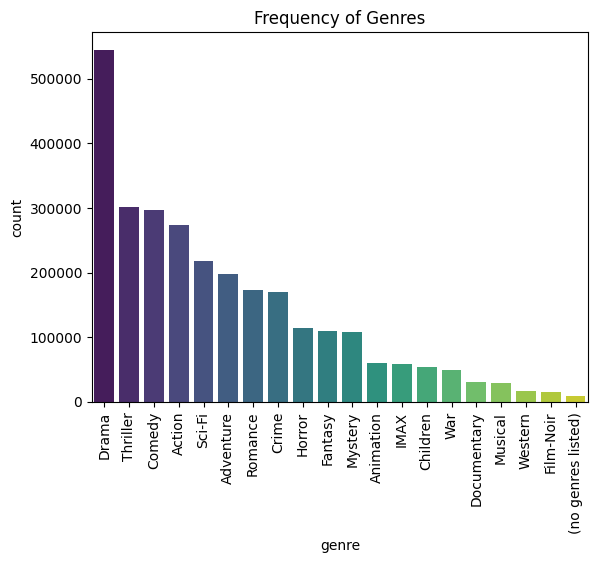

In [ ]:
#visualising using a barplot for easy understanding
#the genre frequency was tranposed and the new dataframe had its column renamed for better understanding
genre_frequency_df = pd.DataFrame([genre_frequency]).T.reset_index()
genre_frequency_df.columns = ['genre', 'count']

sns.barplot(x='genre', y='count', hue='genre', data=genre_frequency_df.sort_values(by='count', ascending=False), palette='viridis')
plt.title('Frequency of Genres')
#rotating the labels to avoid it being jumbled
plt.xticks(rotation=90)
plt.show()

##Data Cleaning

In [ ]:
new_df1.isnull().sum()

,0
movieId,0
title,0
genres,0
userId,0
tag,16
timestamp,0
imdbId,0
tmdbId,282


In [ ]:
new_df1.duplicated().sum()

0

In [ ]:
new_df1.shape

(1093360, 8)

In [ ]:
import re
# Function to clean up movie titles
def clean_movie_title(title):
    """
    Cleans up the movie title by removing the year or any other text within parentheses.

    Args:
        title (str): The movie title to clean, e.g., 'Avatar (2009)'.

    Returns:
        str: The cleaned movie title, e.g., 'Avatar'.
    """
    # Remove any text within parentheses including the parentheses
    cleaned_title = re.sub(r'\s*\(.*?\)', '', title)
    return cleaned_title

# Applying the function to the 'title' column of the DataFrame
new_df1['cleaned_title'] = new_df1['title'].apply(clean_movie_title)

# Display the DataFrame to see the cleaned titles
print(new_df1)



         movieId                         title  \
0              1              Toy Story (1995)   
1              1              Toy Story (1995)   
2              1              Toy Story (1995)   
3              1              Toy Story (1995)   
4              1              Toy Story (1995)   
...          ...                           ...   
1093355   209063  The Prep School Negro (2012)   
1093356   209063  The Prep School Negro (2012)   
1093357   209063  The Prep School Negro (2012)   
1093358   209063  The Prep School Negro (2012)   
1093359   209063  The Prep School Negro (2012)   

                                              genres  userId  \
0        Adventure|Animation|Children|Comedy|Fantasy     791   
1        Adventure|Animation|Children|Comedy|Fantasy    1048   
2        Adventure|Animation|Children|Comedy|Fantasy    1361   
3        Adventure|Animation|Children|Comedy|Fantasy    3164   
4        Adventure|Animation|Children|Comedy|Fantasy    3164   
...            

In [ ]:
new_df1.query("cleaned_title == 'Avatar'")

,movieId,title,genres,userId,tag,timestamp,imdbId,tmdbId,cleaned_title
684658,72998,Avatar (2009),Action|Adventure|Sci-Fi|IMAX,87,James Cameron,1542308389,499549,19995.0,Avatar
684659,72998,Avatar (2009),Action|Adventure|Sci-Fi|IMAX,87,sci-fi,1542308408,499549,19995.0,Avatar
684660,72998,Avatar (2009),Action|Adventure|Sci-Fi|IMAX,87,science fiction,1542308395,499549,19995.0,Avatar
684661,72998,Avatar (2009),Action|Adventure|Sci-Fi|IMAX,91,effects,1415448510,499549,19995.0,Avatar
684662,72998,Avatar (2009),Action|Adventure|Sci-Fi|IMAX,91,environmental,1415448520,499549,19995.0,Avatar
...,...,...,...,...,...,...,...,...,...
686758,72998,Avatar (2009),Action|Adventure|Sci-Fi|IMAX,160948,predictable,1439771925,499549,19995.0,Avatar
686759,72998,Avatar (2009),Action|Adventure|Sci-Fi|IMAX,160948,stereotypes,1439771981,499549,19995.0,Avatar
686760,72998,Avatar (2009),Action|Adventure|Sci-Fi|IMAX,161473,fully realized world,1272303458,499549,19995.0,Avatar
686761,72998,Avatar (2009),Action|Adventure|Sci-Fi|IMAX,161473,simplistic message,1272303471,499549,19995.0,Avatar


from the above we can see that because each movie has been rated by so many users, we have duplicates as a results. To resolve this, we drop the duplicates based on the movie id

In [ ]:
# Dropping duplicates based on 'movieId' and keeping the first occurrence
unique_movies = new_df1.drop_duplicates(subset=['movieId', 'cleaned_title'], keep='first').copy()


# Display the unique movies
print(unique_movies.head())


     movieId                               title  \
0          1                    Toy Story (1995)   
697        2                      Jumanji (1995)   
877        3             Grumpier Old Men (1995)   
906        4            Waiting to Exhale (1995)   
917        5  Father of the Bride Part II (1995)   

                                          genres  userId  \
0    Adventure|Animation|Children|Comedy|Fantasy     791   
697                   Adventure|Children|Fantasy    3164   
877                               Comedy|Romance     210   
906                         Comedy|Drama|Romance    6550   
917                                       Comedy    6550   

                        tag   timestamp  imdbId   tmdbId  \
0                     Owned  1515175493  114709    862.0   
697          Robin Williams  1223305308  113497   8844.0   
877                   funny  1461974440  113228  15602.0   
906  based on novel or book  1528512704  114885  31357.0   
917                   agin

In [ ]:
unique_movies.shape

(45251, 9)

In [ ]:
#we still have some dupicates from the above so we drop the duplicates based on the title
unique_movies = unique_movies.drop_duplicates(subset=['cleaned_title'], keep='first').copy()

In [ ]:
unique_movies.isnull().sum()

,0
movieId,0
title,0
genres,0
userId,0
tag,0
timestamp,0
imdbId,0
tmdbId,47
cleaned_title,0


##Data Scrapping

In [ ]:
from tmdbv3api import TMDb, Movie

# Initialize TMDb with your API key
tmdb = TMDb()
tmdb.api_key = '621972a18a30251740479ecd4f429121'

movie = Movie()

def get_tmdb_plot(movie_title):
    try:
        # Search for the movie
        search_results = movie.search(movie_title)
        if search_results:
            # Get the first search result
            movie_details = search_results[0]
            # Retrieve the plot (overview)
            return movie_details.overview
        else:
            print(f"Movie '{movie_title}' not found on TMDb.")
            return None
    except Exception as e:
        print(f"An error occurred while fetching the plot for {movie_title}: {e}")
        return None

# getting the plot of one movie
plot = get_tmdb_plot('Avatar')
print(plot)


In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.


In [ ]:
# Safely apply the function using .loc to avoid SettingWithCopyWarning
unique_movies.loc[:, 'plot'] = unique_movies['cleaned_title'].apply(get_tmdb_plot)

# Display the DataFrame with added plots
print(unique_movies)

An error occurred while fetching the plot for Marlene Dietrich: Shadow and Light: getattr(): attribute name must be string
An error occurred while fetching the plot for Jungle2Jungle: getattr(): attribute name must be string
An error occurred while fetching the plot for 3 Ninjas: High Noon On Mega Mountain: getattr(): attribute name must be string
An error occurred while fetching the plot for Slums of Beverly Hills, The: getattr(): attribute name must be string
An error occurred while fetching the plot for 24 7: Twenty Four Seven: getattr(): attribute name must be string
An error occurred while fetching the plot for Marcello Mastroianni: I Remember Yes, I Remember: getattr(): attribute name must be string
An error occurred while fetching the plot for Daughter of Dr. Jeckyll: getattr(): attribute name must be string
An error occurred while fetching the plot for Whatever Happened to Aunt Alice?: getattr(): attribute name must be string
An error occurred while fetching the plot for Widow 

In [ ]:
unique_movies.head()

,movieId,title,genres,userId,tag,timestamp,imdbId,tmdbId,cleaned_title,plot
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,791,Owned,1515175493,114709,862.0,Toy Story,"Led by Woody, Andy's toys live happily in his ..."
697,2,Jumanji (1995),Adventure|Children|Fantasy,3164,Robin Williams,1223305308,113497,8844.0,Jumanji,When siblings Judy and Peter discover an encha...
877,3,Grumpier Old Men (1995),Comedy|Romance,210,funny,1461974440,113228,15602.0,Grumpier Old Men,A family wedding reignites the ancient feud be...
906,4,Waiting to Exhale (1995),Comedy|Drama|Romance,6550,based on novel or book,1528512704,114885,31357.0,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom..."
917,5,Father of the Bride Part II (1995),Comedy,6550,aging,1528513373,113041,11862.0,Father of the Bride Part II,Just when George Banks has recovered from his ...


In [ ]:

#scrapping tmdb for the cast name and directors
import requests

def fetch_cast_and_director(movie_title):
    """
    Fetches the top 5 cast members and director of a movie from TMDb.

    Args:
        movie_title (str): The title of the movie.

    Returns:
        tuple: A tuple containing a list of top 5 cast members and the director's name.
    """
    try:
        # Search for the movie by title
        search_results = movie.search(movie_title)
        if search_results:
            # Get the first search result's ID
            movie_id = search_results[0].id

            # Fetch movie details including credits (cast and crew)
            response = requests.get(
                f'https://api.themoviedb.org/3/movie/{movie_id}?api_key={tmdb.api_key}&append_to_response=credits'
            )

            # Check if the request was successful
            if response.status_code != 200:
                print(f"Error fetching data for '{movie_title}': HTTP {response.status_code}")
                return [], 'Director not available'

            # Parse the JSON response safely
            data_json = response.json()

            # Extract the top 5 cast members
            cast = [member['name'] for member in data_json.get('credits', {}).get('cast', [])[:3]
                    if isinstance(member, dict) and 'name' in member]

            # Extract the director's name
            director = [crew['name'] for crew in data_json.get('credits', {}).get('crew', [])
                        if crew.get('job') == 'Director']

            # Use the first director found, if any
            director_name = director[0] if director else 'Director not available'

            return cast, director_name
        else:
            print(f"Movie '{movie_title}' not found on TMDb.")
            return [], 'Director not available'
    except Exception as e:
        print(f"An error occurred while fetching data for '{movie_title}': {e}")
        return [], 'Director not available'

# getting cast and director for one of the movies
movie_title = 'Avatar'
cast, director = fetch_cast_and_director(movie_title)
print(f"Cast: {cast}")
print(f"Director: {director}")


Cast: ['Sam Worthington', 'Zoe Saldaña', 'Sigourney Weaver']
Director: James Cameron


In [ ]:

#Apply the function and store results in a new column as tuples
unique_movies.loc[:, 'cast_and_director'] = unique_movies['cleaned_title'].apply(fetch_cast_and_director)


An error occurred while fetching data for 'Marlene Dietrich: Shadow and Light': getattr(): attribute name must be string
An error occurred while fetching data for 'Jungle2Jungle': getattr(): attribute name must be string
An error occurred while fetching data for '3 Ninjas: High Noon On Mega Mountain': getattr(): attribute name must be string
An error occurred while fetching data for 'Slums of Beverly Hills, The': getattr(): attribute name must be string
An error occurred while fetching data for '24 7: Twenty Four Seven': getattr(): attribute name must be string
An error occurred while fetching data for 'Marcello Mastroianni: I Remember Yes, I Remember': getattr(): attribute name must be string
An error occurred while fetching data for 'Daughter of Dr. Jeckyll': getattr(): attribute name must be string
An error occurred while fetching data for 'Whatever Happened to Aunt Alice?': getattr(): attribute name must be string
An error occurred while fetching data for 'Widow of St. Pierre, The'

In [ ]:
#extracting the cast and directors from the tuples into separate columns
unique_movies.loc[:, 'cast'] = unique_movies['cast_and_director'].apply(lambda x: x[0])
unique_movies.loc[:, 'director'] = unique_movies['cast_and_director'].apply(lambda x: x[1])

In [ ]:

# Define the path to save the file in Google Drive
file_path = '/content/drive/My Drive/unique_movies.csv'

# Save the DataFrame to Google Drive
unique_movies.to_csv(file_path, index=False)
print(f"Preprocessed data saved to {file_path}")

Mounted at /content/drive
Preprocessed data saved to /content/drive/My Drive/unique_movies.csv


## Preprocessing

In [ ]:
unique_moviecsv = pd.read_csv('/content/drive/My Drive/unique_movies.csv', sep=',', engine='python')


In [ ]:

unique_moviecsv

,movieId,title,genres,userId,tag,timestamp,imdbId,tmdbId,cleaned_title,plot,cast_and_director,cast,director
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,791,Owned,1.515175e+09,114709.0,862.0,Toy Story,"Led by Woody, Andy's toys live happily in his ...","(['Tom Hanks', 'Tim Allen', 'Don Rickles'], 'J...","['Tom Hanks', 'Tim Allen', 'Don Rickles']",John Lasseter
1,2,Jumanji (1995),Adventure|Children|Fantasy,3164,Robin Williams,1.223305e+09,113497.0,8844.0,Jumanji,When siblings Judy and Peter discover an encha...,"(['Robin Williams', 'Kirsten Dunst', 'Bradley ...","['Robin Williams', 'Kirsten Dunst', 'Bradley P...",Joe Johnston
2,3,Grumpier Old Men (1995),Comedy|Romance,210,funny,1.461974e+09,113228.0,15602.0,Grumpier Old Men,A family wedding reignites the ancient feud be...,"(['Walter Matthau', 'Jack Lemmon', 'Ann-Margre...","['Walter Matthau', 'Jack Lemmon', 'Ann-Margret']",Howard Deutch
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,6550,based on novel or book,1.528513e+09,114885.0,31357.0,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...","(['Whitney Houston', 'Angela Bassett', 'Lorett...","['Whitney Houston', 'Angela Bassett', 'Loretta...",Forest Whitaker
4,5,Father of the Bride Part II (1995),Comedy,6550,aging,1.528513e+09,113041.0,11862.0,Father of the Bride Part II,Just when George Banks has recovered from his ...,"(['Steve Martin', 'Diane Keaton', 'Martin Shor...","['Steve Martin', 'Diane Keaton', 'Martin Short']",Charles Shyer
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42416,208813,Noelle (2019),Children,72360,might like,1.573730e+09,5097410.0,454467.0,Noelle,"Kris Kringle's daughter, Noelle, sets off on a...","(['Anna Kendrick', 'Bill Hader', 'Kingsley Ben...","['Anna Kendrick', 'Bill Hader', 'Kingsley Ben-...",Marc Lawrence
42417,208933,The Devil's Partner (1961),Horror,83426,black and white,1.573874e+09,51536.0,125686.0,The Devil's Partner,An adventure tale set in the North Woods. The ...,"(['Norma Shearer', 'Charles Delaney', 'Henry S...","['Norma Shearer', 'Charles Delaney', 'Henry Se...",Caryl S. Fleming
42418,209035,time for sushi (2017),Animation|Comedy,148457,computer animation,1.573951e+09,8002980.0,508748.0,time for sushi,"A sequel to the 2011 ""Going to the Store"" and ...","([], 'David Lewandowski')",[],David Lewandowski
42419,209037,Our Wonderful Nature - The Common Chameleon (2...,(no genres listed),148457,chameleon,1.573952e+09,6522646.0,460474.0,Our Wonderful Nature - The Common Chameleon,In a world where a single chameleon has no nat...,"(['John Berwick'], 'Tomer Eshed')",['John Berwick'],Tomer Eshed


In [ ]:
unique_moviecsv.isnull().sum()

,0
movieId,0
title,2
genres,2
userId,2
tag,8
timestamp,8
imdbId,8
tmdbId,55
cleaned_title,9
plot,626


In [ ]:
unique_moviecsv.columns

Index(['movieId', 'title', 'genres', 'userId', 'tag', 'timestamp', 'imdbId',
       'tmdbId', 'cleaned_title', 'plot', 'cast_and_director', 'cast',
       'director'],
      dtype='object')

In [ ]:
#some unnecessary columns will be dropped from the dataset
movies_df = unique_moviecsv.drop(columns=['cast_and_director', 'title', 'imdbId', 'userId', 'timestamp'])

In [ ]:
movies_df.head()

,movieId,genres,tag,tmdbId,cleaned_title,plot,cast,director
0,1,Adventure|Animation|Children|Comedy|Fantasy,Owned,862.0,Toy Story,"Led by Woody, Andy's toys live happily in his ...","['Tom Hanks', 'Tim Allen', 'Don Rickles']",John Lasseter
1,2,Adventure|Children|Fantasy,Robin Williams,8844.0,Jumanji,When siblings Judy and Peter discover an encha...,"['Robin Williams', 'Kirsten Dunst', 'Bradley P...",Joe Johnston
2,3,Comedy|Romance,funny,15602.0,Grumpier Old Men,A family wedding reignites the ancient feud be...,"['Walter Matthau', 'Jack Lemmon', 'Ann-Margret']",Howard Deutch
3,4,Comedy|Drama|Romance,based on novel or book,31357.0,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...","['Whitney Houston', 'Angela Bassett', 'Loretta...",Forest Whitaker
4,5,Comedy,aging,11862.0,Father of the Bride Part II,Just when George Banks has recovered from his ...,"['Steve Martin', 'Diane Keaton', 'Martin Short']",Charles Shyer


In [ ]:
#renaming some columns
movies_df = movies_df.rename(columns={'cleaned_title':'title'})
movies_df = movies_df.rename(columns={'plot':'overview'})

In [ ]:
movies_df = movies_df.fillna('')

In [ ]:
movies_df.isnull().sum()

,0
movieId,0
genres,0
tag,0
tmdbId,0
title,0
overview,0
cast,0
director,0


### Text Preprocessing

In [ ]:
#first we turn the genre column into list
movies_df['genres'] = movies_df['genres'].apply(lambda x: x.split("|"))

In [ ]:
before_pp = unique_moviecsv['genres'].iloc[0]
after_pp = movies_df['genres'].iloc[0]

print("Before Preprocessing:")
print(before_pp)

print("\nAfter Preprocessing:")
print(after_pp)

Before Preprocessing:
Adventure|Animation|Children|Comedy|Fantasy

After Preprocessing:
['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy']


In [ ]:
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# downloading necessary NLTK data
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Initialize stop words and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
import string
import re

def preprocess_text(text):
    """
    Preprocesses text by converting to lowercase, removing punctuation,
    stripping whitespace, and tokenizing the text.
    Handles lists by joining elements into a string.

    Args:
        text (str or list): The text to preprocess, or a list of strings.

    Returns:
        list: The cleaned, tokenized text as a list of words.
    """
    # Handle None values
    if text is None:
        return []

    # If the input is a list, join elements into a single string
    if isinstance(text, list):
        text = ' '.join(text)

    # Convert text to lowercase
    text = text.lower()

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()

    # Tokenize the text (split by whitespace)
    tokens = text.split()

    return tokens




In [ ]:
#applying the funtion to the text columns
movies_df['overview'] = movies_df['overview'].apply(preprocess_text)
movies_df['tag'] = movies_df['tag'].apply(preprocess_text)
movies_df['cast'] = movies_df['cast'].apply(preprocess_text)
movies_df['director'] = movies_df['director'].apply(preprocess_text)
movies_df['genres'] = movies_df['genres'].apply(preprocess_text)

In [ ]:
before_pp = unique_moviecsv['plot'].iloc[0]
after_pp = movies_df['overview'].iloc[0]

print("Before Preprocessing:")
print(before_pp)

print("\nAfter Preprocessing:")
print(after_pp)

Before Preprocessing:
Led by Woody, Andy's toys live happily in his room until Andy's birthday brings Buzz Lightyear onto the scene. Afraid of losing his place in Andy's heart, Woody plots against Buzz. But when circumstances separate Buzz and Woody from their owner, the duo eventually learns to put aside their differences.

After Preprocessing:
led by woody andys toys live happily in his room until andys birthday brings buzz lightyear onto the scene afraid of losing his place in andys heart woody plots against buzz but when circumstances separate buzz and woody from their owner the duo eventually learns to put aside their differences


In [ ]:
movies_df.head()

,movieId,genres,tag,tmdbId,title,overview,cast,director
0,1,[adventureanimationchildrencomedyfantasy],[owned],862.0,Toy Story,"[led, by, woody, andys, toys, live, happily, i...","[tom, hanks, tim, allen, don, rickles]","[john, lasseter]"
1,2,[adventurechildrenfantasy],"[robin, williams]",8844.0,Jumanji,"[when, siblings, judy, and, peter, discover, a...","[robin, williams, kirsten, dunst, bradley, pie...","[joe, johnston]"
2,3,[comedyromance],[funny],15602.0,Grumpier Old Men,"[a, family, wedding, reignites, the, ancient, ...","[walter, matthau, jack, lemmon, annmargret]","[howard, deutch]"
3,4,[comedydramaromance],"[based, on, novel, or, book]",31357.0,Waiting to Exhale,"[cheated, on, mistreated, and, stepped, on, th...","[whitney, houston, angela, bassett, loretta, d...","[forest, whitaker]"
4,5,[comedy],[aging],11862.0,Father of the Bride Part II,"[just, when, george, banks, has, recovered, fr...","[steve, martin, diane, keaton, martin, short]","[charles, shyer]"


In [ ]:

# next we Combine preprocessed features into a single column
movies_df['tokenized_comb_feat'] = movies_df[['genres', 'overview', 'director', 'cast']].apply(lambda row: row['genres'] + row['overview'] + row['director'] + row['cast'], axis=1)


In [ ]:
movies_df.columns

Index(['movieId', 'genres', 'tag', 'tmdbId', 'title', 'overview', 'cast',
       'director', 'tokenized_comb_feat'],
      dtype='object')

In [ ]:
movies = movies_df.loc[:, ['movieId', 'tmdbId','title', 'tokenized_comb_feat']]

In [ ]:
# Convert tokenized lists to space-separated strings
movies['comb_feat'] = movies['tokenized_comb_feat'].apply(lambda x: ' '.join(x))


In [ ]:
movies

,movieId,tmdbId,title,tokenized_comb_feat,comb_feat
0,1,862.0,Toy Story,"[adventure, animation, children, comedy, fanta...",adventure animation children comedy fantasy le...
1,2,8844.0,Jumanji,"[adventure, children, fantasy, when, siblings,...",adventure children fantasy when siblings judy ...
2,3,15602.0,Grumpier Old Men,"[comedy, romance, a, family, wedding, reignite...",comedy romance a family wedding reignites the ...
3,4,31357.0,Waiting to Exhale,"[comedy, drama, romance, cheated, on, mistreat...",comedy drama romance cheated on mistreated and...
4,5,11862.0,Father of the Bride Part II,"[comedy, just, when, george, banks, has, recov...",comedy just when george banks has recovered fr...
...,...,...,...,...,...
42416,208813,454467.0,Noelle,"[children, kris, kringles, daughter, noelle, s...",children kris kringles daughter noelle sets of...
42417,208933,125686.0,The Devil's Partner,"[horror, an, adventure, tale, set, in, the, no...",horror an adventure tale set in the north wood...
42418,209035,508748.0,time for sushi,"[animation, comedy, a, sequel, to, the, 2011, ...",animation comedy a sequel to the 2011 going to...
42419,209037,460474.0,Our Wonderful Nature - The Common Chameleon,"[no, genres, listed, in, a, world, where, a, s...",no genres listed in a world where a single cha...


In [ ]:
# Using pd.to_numeric with errors='coerce' will turn non-numeric values into NaN
movies['tmdbId'] = pd.to_numeric(movies['tmdbId'], errors='coerce')

In [ ]:
# Fill NaN values with a placeholder integer
movies['tmdbId'] = movies['tmdbId'].fillna(0)


In [ ]:
#Convert to integer
movies['tmdbId'] = movies['tmdbId'].astype(int)

In [ ]:
# Use the `drop=True` parameter to avoid adding the old index as a column
movies = movies.reset_index(drop=True)

##Model Building

###TFIDF

Using term frequency and inverse document frequency

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Initialize the TF-IDF vectorizer
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)

# Fit and transform the text data
tfidf_matrix = tfidf.fit_transform(movies['comb_feat'])

In [ ]:
# Get the feature names (i.e., terms in the vocabulary)
feature_names = tfidf.get_feature_names_out()

# Print the TF-IDF matrix
print("TF-IDF Matrix (Sparse Format):")
print(tfidf_matrix)


TF-IDF Matrix (Sparse Format):
  (0, 105)	0.09037717623159171
  (0, 227)	0.10528252071608869
  (0, 792)	0.09669363342775648
  (0, 912)	0.058288404840885016
  (0, 1643)	0.10356742097848433
  (0, 2639)	0.14376268851568855
  (0, 4941)	0.5262840941612077
  (0, 4573)	0.20240194569613099
  (0, 2712)	0.119625224011462
  (0, 2036)	0.18230961903747706
  (0, 3880)	0.154162238033589
  (0, 484)	0.16701103554173585
  (0, 572)	0.14585748344496827
  (0, 3969)	0.15530322954422024
  (0, 116)	0.19320808596617986
  (0, 2752)	0.16044715800767267
  (0, 3432)	0.12690452430914523
  (0, 2078)	0.13828861783635452
  (0, 3458)	0.17831227129055724
  (0, 825)	0.17096144855875575
  (0, 4037)	0.17601964863369768
  (0, 3284)	0.1395771048412578
  (0, 1374)	0.17766664214386482
  (0, 1546)	0.14291425631000032
  (0, 2635)	0.1356357343015916
  :	:
  (42420, 3674)	0.15210170327797137
  (42420, 2115)	0.12450167718888153
  (42420, 3975)	0.22717699730457372
  (42420, 4334)	0.1467742278726495
  (42420, 1012)	0.1816793415388978

In [ ]:
#Calculate cosine similarity
cosine_sim_tfidf = cosine_similarity(tfidf_matrix, tfidf_matrix)


In [ ]:
#print the shape of cosine similarity
print(cosine_sim_tfidf.shape)

(42421, 42421)


In [ ]:
# Convert to DataFrame for easier viewing
cosine_sim_df_tfidf = pd.DataFrame(cosine_sim_tfidf, index=movies['title'], columns=movies['title'])

In [ ]:
# Check similarity for a specific movie

movie_title = 'Avatar'
similar_movies_tfidf = cosine_sim_df_tfidf[movie_title].sort_values(ascending=False)
print(similar_movies_tfidf.head(10))

title
Avatar                 1.000000
Ghosts of the Abyss    0.314126
Aliens of the Deep     0.289405
Aliens                 0.247359
The Guardians          0.241489
Titanic 2              0.227381
Alien Evolution        0.221674
Rakka                  0.209576
Spider-Man 3           0.204736
Apollo 18              0.198782
Name: Avatar, dtype: float64


In [ ]:
movie_title = 'Toy Story'
similar_movies_tfidf = cosine_sim_df_tfidf[movie_title].sort_values(ascending=False)
print(similar_movies_tfidf.head(10))

title
Toy Story                   1.000000
Toy Story 2                 0.405769
Toy Story 4                 0.354190
Love and Death              0.348927
Toy Story 3                 0.342401
Annie Hall                  0.337718
Take the Money and Run      0.336609
Stardust Memories           0.336514
Scoop                       0.335728
Manhattan Murder Mystery    0.334726
Name: Toy Story, dtype: float64


In [ ]:
movie_title = 'Jumanji'
similar_movies_tfidf = cosine_sim_df_tfidf[movie_title].sort_values(ascending=False)
print(similar_movies_tfidf.head(10))

title
Toy Story                   1.000000
Toy Story 2                 0.405769
Toy Story 4                 0.354190
Toy Story 3                 0.342401
Annie Hall                  0.337718
Take the Money and Run      0.336609
Stardust Memories           0.336514
Scoop                       0.335728
Manhattan Murder Mystery    0.334726
Love and Death              0.333698
Name: Toy Story, dtype: float64


In [ ]:
merged_data.reset_index(drop=True, inplace=True)

In [ ]:
merged_data.columns

Index(['userId', 'movieId', 'rating', 'timestamp', 'title', 'genres'], dtype='object')

In [ ]:
movies.columns

Index(['movieId', 'tmdbId', 'title', 'tokenized_comb_feat', 'comb_feat'], dtype='object')

In [ ]:
from sklearn.metrics import precision_score, recall_score


###Word2Vec

In [ ]:
# Train a Word2Vec model on the tokenized descriptions

from gensim.models import Word2Vec
w2v_model = Word2Vec(sentences=movies['tokenized_comb_feat'], vector_size=100, window=5, min_count=1, workers=4)


In [ ]:
# Function to get the average Word2Vec vector for a movie's combined feature
def get_avg_w2v_vector(combined_feature):
    vectors = [w2v_model.wv[word] for word in combined_feature if word in w2v_model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(100)


In [ ]:
# Apply the function to each movie's combined feature
movies['w2v_vector'] = movies['tokenized_comb_feat'].apply(get_avg_w2v_vector)


In [ ]:
# Convert vectors to a matrix for similarity computation
w2v_matrix = np.vstack(movies['w2v_vector'].values)

In [ ]:
# Compute cosine similarity based on Word2Vec vectors
w2v_cosine_sim = cosine_similarity(w2v_matrix)


In [ ]:
print(type(w2v_cosine_sim))  # Check the type of w2v_cosine_sim

<class 'numpy.ndarray'>


In [ ]:
# Create a DataFrame from the similarity matrix
w2v_cosine_sim_df = pd.DataFrame(w2v_cosine_sim, index=movies['title'], columns=movies['title'])

# Access the similarity scores for 'Avatar'
if 'Avatar' in w2v_cosine_sim_df.columns:
    similar_movies_w2v = w2v_cosine_sim_df['Avatar'].sort_values(ascending=False)
    print(similar_movies_w2v.head(10))
else:
    print("Movie title 'Avatar' not found in the DataFrame.")

title
Avatar                                 1.000000
Die Another Day                        0.976263
Assassin's Bullet                      0.974418
Forbidden Kingdom, The                 0.974029
Perils of the Sentimental Swordsman    0.971930
Losers, The                            0.971553
The Day of the Triffids                0.971261
November Man, The                      0.971122
Jupiter Ascending                      0.970954
Tarzan's Magic Fountain                0.970379
Name: Avatar, dtype: float64


In [ ]:
# Check similarity for a specific movie

similar_movies_w2v = w2v_cosine_sim_df['Toy Story'].sort_values(ascending=False)
print(similar_movies_w2v.head(10))

title
Toy Story                                     1.000000
The Dukes of Hazzard: The Beginning           0.979868
The Family                                    0.976627
The Year Without a Santa Claus                0.975208
Homeward Bound II: Lost in San Francisco      0.975171
How to Train Your Dragon: The Hidden World    0.974422
Dukes of Hazzard, The                         0.973920
Stuart Little 2                               0.973688
Rare Breed, The                               0.973677
Private Function, A                           0.973657
Name: Toy Story, dtype: float64


In [ ]:
# Check similarity for a specific movie

similar_movies_w2v = w2v_cosine_sim_df['Jumanji'].sort_values(ascending=False)
print(similar_movies_w2v.head(10))

title
Jumanji                     1.000000
Supervolcano                0.985355
Crawl or Die                0.984266
Earthfall                   0.983159
2LDK                        0.982570
The Houses October Built    0.982386
Sacrament, The              0.982259
Planet of Dinosaurs         0.982175
The Hollow                  0.982119
Village of the Giants       0.982115
Name: Jumanji, dtype: float64


###BERT

In [ ]:
from transformers import DistilBertTokenizer, DistilBertModel

# Load DistilBERT model and tokenizer
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = DistilBertModel.from_pretrained('distilbert-base-uncased')


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

In [ ]:
import torch

def get_bert_embeddings_batch(texts, batch_size=8):
    embeddings = []
    for i in range(0, len(texts), batch_size):
        batch_texts = texts[i:i+batch_size]
        inputs = tokenizer(batch_texts, return_tensors='pt', padding=True, truncation=True)

        with torch.no_grad():
            outputs = model(**inputs)

        batch_embeddings = outputs.last_hidden_state.mean(dim=1).numpy()
        embeddings.extend(batch_embeddings)

    return np.array(embeddings)

# Generate embeddings in batches
embeddings = get_bert_embeddings_batch(movies['comb_feat'].tolist())


In [ ]:
def get_similar_movies(title, embeddings, movie_titles):
    # Find the index of the movie
    idx = movie_titles.index(title)

    # Compute cosine similarity
    cosine_sim_spec = cosine_similarity([embeddings[idx]], embeddings)[0]

    # Create a DataFrame of similarity scores
    similarity_df = pd.DataFrame({
        'title': movie_titles,
        'similarity': cosine_sim_spec
    })

    # Exclude the movie itself from the results
    similarity_df = similarity_df[similarity_df['title'] != title]
    return similarity_df.sort_values(by='similarity', ascending=False)

# List of movie titles
movie_titles = movies['title'].tolist()


to examine the similarity scores of the movies recommended by the model

In [ ]:
# Get similar movies for a specific movie
title = 'Toy Story'
similar_movies = get_similar_movies(title, embeddings, movie_titles)
print(similar_movies.head(10))

                                         title  similarity
2824                               Toy Story 2    0.957331
8812                                Fat Albert    0.939313
41996                              Toy Story 4    0.935773
10288                         Snoopy Come Home    0.930527
26014            Tom and Jerry: The Magic Ring    0.928126
3089   Sesame Street Presents Follow That Bird    0.927573
6388              Looney Tunes: Back in Action    0.923930
4485                            Monsters, Inc.    0.923667
20574             Ice Age: A Mammoth Christmas    0.923266
37069           The Nut Job 2: Nutty by Nature    0.923180


In [ ]:
# Compute cosine similarity matrix for all movie embeddings
cosine_sim_dbert = cosine_similarity(embeddings)

#the cosine similarity shape
print(cosine_sim_dbert.shape)

(42421, 42421)


In [ ]:
def give_recommendations(title, movies, embeddings, cosine_sim_dbert, top_n=10):
    """
    Recommends movies based on the cosine similarity scores and embeddings.

    Args:
        title (str): The title of the movie for which recommendations are to be made.
        movies (DataFrame): The DataFrame containing movie details.
        embeddings (numpy.ndarray): Precomputed BERT embeddings for all movies.
        cosine_sim (array): The precomputed cosine similarity matrix.
        top_n (int): Number of top similar movie recommendations to return.

    Returns:
        list: A list of recommended movie titles and their similarity scores.
    """
    try:
        # Check if the movie title exists in the dataset
        if title not in movies['title'].values:
            print(f"Movie '{title}' does not exist in the database.")
            return []

        # Get the index of the movie that matches the title
        idx = movies[movies['title'] == title].index[0]

        # Get the pairwise similarity scores of all movies with that movie
        sim_scores = list(enumerate(cosine_sim_dbert[idx]))

        # Sort the movies based on the similarity scores
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

        # Get the indices of the top N most similar movies
        sim_scores = sim_scores[1:top_n + 1]
        movie_indices = [i[0] for i in sim_scores]

        # Return the top N most similar movies and their similarity scores
        return [(movies['title'].iloc[i], sim_scores[j][1]) for j, i in enumerate(movie_indices)]

    except IndexError:
        print("An index error occurred. Please ensure the indices are correct and match the cosine similarity matrix.")
        return []

    except Exception as e:
        print(f"An unexpected error occurred: {e}")
        return []


In [ ]:
recommendations = give_recommendations('Avatar', movies, embeddings, cosine_sim_dbert, top_n=10)

# Print the recommended movies with ranking numbers
print("Recommended Movies:")
for idx, (title, score) in enumerate(recommendations, start=1):
    print(f"{idx}. {title} (Similarity Score: {score:.4f})")


Recommended Movies:
1. Aliens (Similarity Score: 0.9495)
2. Event Horizon (Similarity Score: 0.9458)
3. Gattaca (Similarity Score: 0.9443)
4. Lockout (Similarity Score: 0.9408)
5. Blade Runner (Similarity Score: 0.9406)
6. Star Wars: Episode II - Attack of the Clones (Similarity Score: 0.9401)
7. The Day of the Triffids (Similarity Score: 0.9398)
8. Predator (Similarity Score: 0.9397)
9. Stealth (Similarity Score: 0.9382)
10. IO (Similarity Score: 0.9374)


In [ ]:
recommendations = give_recommendations('The Batman vs. Dracula', movies, embeddings, cosine_sim_dbert, top_n=10)

# Print the recommended movies with ranking numbers
print("Recommended Movies:")
for idx, (title, score) in enumerate(recommendations, start=1):
    print(f"{idx}. {title} (Similarity Score: {score:.4f})")

Recommended Movies:
1. Megamind (Similarity Score: 0.9373)
2. Batman Unlimited: Monster Mayhem (Similarity Score: 0.9337)
3. The Phantom (Similarity Score: 0.9336)
4. Mystery Men (Similarity Score: 0.9304)
5. Batman & Harley Quinn (Similarity Score: 0.9245)
6. Batman: Mask of the Phantasm (Similarity Score: 0.9242)
7. Puppet Master 5: The Final Chapter (Similarity Score: 0.9237)
8. Ghost Rider: Spirit of Vengeance (Similarity Score: 0.9236)
9. Batman and Robin (Similarity Score: 0.9232)
10. The Batwoman (Similarity Score: 0.9228)


In [ ]:
def get_recommendations(user_id, ground_truth1, cosine_sim, movies, top_n=3):
    # Get the list of movies rated by the user
    user_movie_titles = ground_truth1[ground_truth1['userId'] == user_id]['title'].tolist()

    # Return an empty list if no movies were found for the user
    if not user_movie_titles:
        return []

    # Get indices of the user's rated movies in the movies DataFrame
    rated_movie_indices = movies[movies['title'].isin(user_movie_titles)].index.tolist()

    sim_scores = []
    # Loop through the indices of the movies the user rated
    for idx in rated_movie_indices:
        # Ensure the index is within bounds of the cosine similarity matrix
        if idx < cosine_sim.shape[0]:
            sim_scores.extend(list(enumerate(cosine_sim_dbert[idx])))
        else:
            print(f"Index {idx} is out of bounds for the cosine similarity matrix.")

    # Sort the similarity scores in descending order of similarity
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Collect top N movie recommendations, excluding movies already rated by the user
    top_indices = []
    for i in sim_scores:
        movie_title = movies.iloc[i[0]]['title']
        if movie_title not in user_movie_titles and len(top_indices) < top_n:
            top_indices.append(i[0])

    # Fetch the recommended movie titles using the top indices
    recommended_titles = movies.iloc[top_indices]['title'].tolist()

    return recommended_titles


In [ ]:
# Generate recommendations for multiple users using DistilBERT
recommendations = {
    'userId': [],
    'recommended_movies': []
}

# Reset the index of ground_truth for safety
ground_truth = ground_truth1.reset_index(drop=True)

# Loop over unique user IDs in ground truth
for user_id in ground_truth['userId'].unique():
    user_movies = ground_truth[ground_truth['userId'] == user_id]['title'].tolist()

    # Debugging output
    print(f"Processing user_id: {user_id}, rated movies: {user_movies}")

    # Check if the user has rated any movies
    if user_movies:
        # Generate recommendations using DistilBERT cosine similarity
        recommended_movies = get_recommendations(user_id, ground_truth, cosine_sim_dbert, movies, top_n=3)
        recommendations['userId'].append(user_id)
        recommendations['recommended_movies'].append(recommended_movies)
    else:
        # If no rated movies, append an empty list
        recommendations['userId'].append(user_id)
        recommendations['recommended_movies'].append([])  # No recommendations possible

# Convert to DataFrame for easy access
recommendations_dbert = pd.DataFrame(recommendations)



Streaming output truncated to the last 5000 lines.
Processing user_id: 21161, rated movies: ['Fantastic Fear of Everything, A (2012)', 'How to Be a Man (2013)', 'Paulette (2012)', 'Ruby Red (2013)', 'Blind (2007)', 'Dialogues (2014)', 'Moonlight Tariff (2001)', 'Metamorphosis (2003)', 'Я худею (2018)']
Processing user_id: 143680, rated movies: ['Deadfall (2012)', 'Love Bites (1993)']
Processing user_id: 91034, rated movies: ['Skirt Day (La journée de la jupe) (2008)', 'Secret in Their Eyes (2015)', 'The Do-Over (2016)', 'Finding Altamira (2016)']
Processing user_id: 54821, rated movies: ['Moral Tales, Filmic Issues (2006)']
Processing user_id: 157494, rated movies: ['Journey to Saturn (Rejsen til Saturn) (2008)']
Processing user_id: 21948, rated movies: ['Byzantium (2012)', "Young and Prodigious T.S. Spivet, The (L'extravagant voyage du jeune et prodigieux T.S. Spivet) (2013)", 'When I Live My Life Over Again (2015)']
Processing user_id: 5469, rated movies: ['Byzantium (2012)', "Devil'

In [ ]:
# Function to get movie recommendations based on cosine similarity
# Define a function to get movie recommendations based on cosine similarity
def give_recommendations(title, movies, cosine_sim):
    """
    Recommends movies based on the cosine similarity scores.

    Args:
        title (str): The title of the movie for which recommendations are to be made.
        movies (DataFrame): The DataFrame containing movie details.
        cosine_sim (array): The precomputed cosine similarity matrix.

    Returns:
        list: A list of recommended movie titles.
    """
    try:
        # Check if the movie title exists in the dataset
        if title not in movies['title'].values:
            print(f"Movie '{title}' does not exist in the database.")
            return []

        # Get the index of the movie that matches the title
        idx = movies[movies['title'] == title].index[0]

        # Get the pairwise similarity scores of all movies with that movie
        sim_scores = list(enumerate(cosine_sim[idx]))

        # Sort the movies based on the similarity scores
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

        # Get the indices of the top 10 most similar movies
        sim_scores = sim_scores[1:11]
        movie_indices = [i[0] for i in sim_scores]

        # Return the top 10 most similar movies
        return movies['title'].iloc[movie_indices].tolist()

    except IndexError:
        print("An index error occurred. Please ensure the indices are correct and match the cosine similarity matrix.")
        return []

    except Exception as e:
        print(f"An unexpected error occurred: {e}")
        return []

In [ ]:
recommendations = give_recommendations('Avatar', movies, cosine_sim)
print("Recommended Movies:", recommendations)


Recommended Movies: ['Ghosts of the Abyss', 'Aliens of the Deep', 'Titanic 2', 'Brain Dead', 'Titanic: The Final Word with James Cameron', 'Complicity', 'Alien Evolution', 'Deepsea Challenge 3D', 'Aliens', "The Making of 'The Terminator': A Retrospective"]


In [ ]:
recommendations = give_recommendations('Toy Story',  movies, cosine_sim)
print("Recommended Movies:", recommendations)


Recommended Movies: ['Toy Story 2', 'Scoop', 'Annie Hall', 'Stardust Memories', 'Love and Death', 'Manhattan Murder Mystery', 'Toy Story 4', 'Take the Money and Run', 'Shadows and Fog', 'Hollywood Ending']


In [ ]:
import pickle
import os


# Ensure the 'final' directory exists
os.makedirs('final', exist_ok=True)

# Save the 'movies' DataFrame to a pickle file
with open('final/movies.pkl', 'wb') as file:
    pickle.dump(movies, file)

# Save the 'cosine_sim' variable to a pickle file
with open('final/cosine_sim.pkl', 'wb') as file:
    pickle.dump(cosine_sim, file)
